In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


<Axes: >

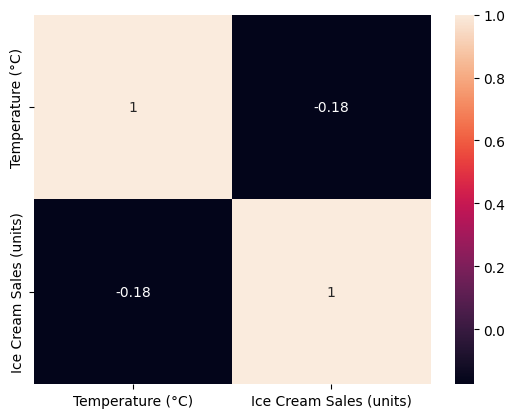

In [5]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

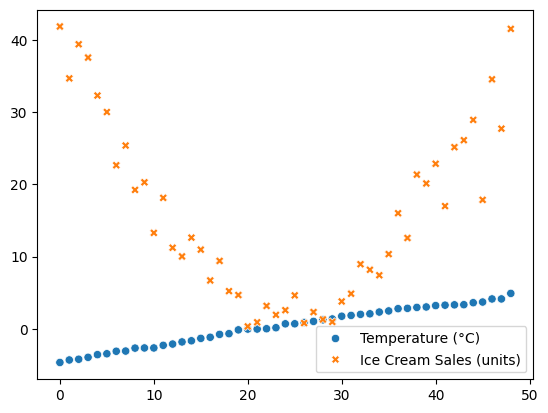

In [6]:
sns.scatterplot(df)

In [7]:
x=df[["Temperature (°C)"]]
y=df["Ice Cream Sales (units)"]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [9]:
model=LinearRegression()
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
model.intercept_

np.float64(17.139213127718417)

In [11]:
model.coef_

array([-1.14658686])

In [12]:
model.score(xtest,ytest)

-0.5751270190188227

In [13]:
model.score(xtrain,ytrain)

0.06579063815950037

In [14]:
poly=PolynomialFeatures()
xtrain_poly=poly.fit_transform(xtrain)
xtest_poly=poly.fit_transform(xtest)

In [15]:
model=LinearRegression()

In [16]:
model.fit(xtrain_poly,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
model.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [18]:
model.intercept_

np.float64(2.7683058295738583)

In [19]:
# model.score(xtest,ytest)
# X has 1 features, but LinearRegression is expecting 3 features as input. 

In [20]:
model.score(xtest_poly,ytest)

0.843055137193884

In [21]:
model.score(xtrain_poly,ytrain)

0.9413665676490518

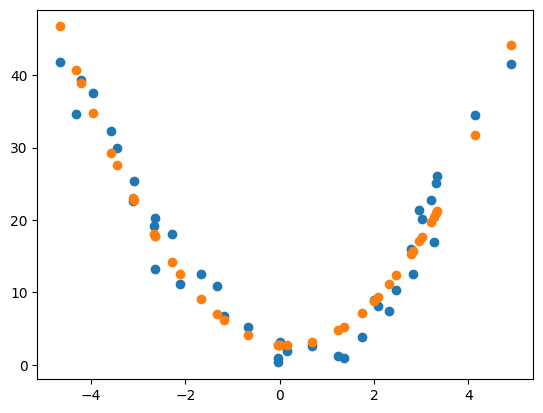

In [22]:
plt.scatter(xtrain["Temperature (°C)"],ytrain)
plt.scatter(xtrain["Temperature (°C)"],model.predict(xtrain_poly))

### Here we need to use the same column name, which is used during the fit. otherwise it throws an error